<a href="https://colab.research.google.com/github/abhinavhada/RainfallPrediction-RNN/blob/master/TARP_sunday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [0]:
from google.colab import files
uploaded=files.upload()
print(uploaded.keys())

Saving daily_final_ultimate.csv to daily_final_ultimate.csv
dict_keys(['daily_final_ultimate.csv'])


In [0]:
data = pd.read_csv(list(uploaded.keys())[0],sep=",")
data = data.fillna(data.mean())
data.info()
data.head()
data=data.drop(['Snowfall','UT time','Snow depth'],axis=1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
Date                       1826 non-null object
UT time                    1826 non-null object
Temperature                1826 non-null float64
Relative Humidity          1826 non-null float64
Pressure                   1826 non-null float64
Wind speed                 1826 non-null float64
Wind direction             1826 non-null float64
Rainfall                   1826 non-null float64
Snowfall                   1826 non-null int64
Snow depth                 1826 non-null int64
Short-wave irradiation	    1826 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 157.0+ KB


,Date,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Short-wave irradiation\t
0,01-01-2015,298.33,81.35,1006.40,2.11,177.31,0.251461,5343.844
1,02-01-2015,298.83,83.74,1009.09,3.50,148.75,1.928893,5198.639
2,03-01-2015,298.64,82.31,1009.81,2.56,104.63,0.826237,5586.175
3,04-01-2015,298.53,79.81,1010.02,2.92,49.43,0.231998,5238.794
4,05-01-2015,298.17,80.94,1009.59,3.34,35.46,0.107708,5791.962


In [0]:
# # X will be a pandas dataframe of all columns except meantempm
# X = data[[col for col in data.columns if col != 'Rainfall']]

# # y will be a pandas series of the meantempm
# y = data['Rainfall']
# print(X)
# for i in X:
#   print(i)


[['01-01-2015' 298.33 81.35 ... 177.31 0.251461 5343.844]
 ['02-01-2015' 298.83 83.74 ... 148.75 1.928893 5198.639]
 ['03-01-2015' 298.64 82.31 ... 104.63 0.8262370000000001 5586.175]
 ...
 ['29-12-2019' 298.52 78.8 ... 60.47 0.828491 5104.953]
 ['30-12-2019' 298.71 79.45 ... 76.61 1.840186 4963.799]
 ['31-12-2019' 299.01 79.51 ... 71.96 2.413246 5179.114]]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


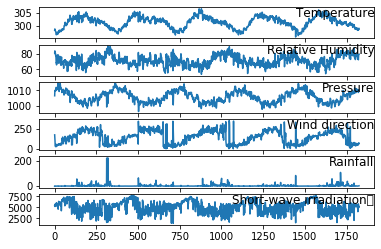

In [0]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = data.values
print(values)
# specify columns to plot
groups = [ 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# load dataset
dataset = read_csv(list(uploaded.keys())[0], header=0, index_col=0)
dataset=dataset.drop(['Snowfall','UT time','Snow depth'],axis=1)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
print(values)
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.columns)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9,10,11,13]], axis=1, inplace=True)
print(reframed.head())

[[2.983300e+02 8.135000e+01 1.006400e+03 ... 1.057000e+03 2.514610e-01
  5.343844e+03]
 [2.988300e+02 8.374000e+01 1.009090e+03 ... 7.750000e+02 1.928893e+00
  5.198639e+03]
 [2.986400e+02 8.231000e+01 1.009810e+03 ... 6.240000e+02 8.262370e-01
  5.586175e+03]
 ...
 [2.985200e+02 7.880000e+01 1.009840e+03 ... 3.850000e+02 8.284910e-01
  5.104953e+03]
 [2.987100e+02 7.945000e+01 1.010060e+03 ... 5.110000e+02 1.840186e+00
  4.963799e+03]
 [2.990100e+02 7.951000e+01 1.010120e+03 ... 4.870000e+02 2.413246e+00
  5.179114e+03]]
[[0.23970032 0.7632518  0.5584755  ... 0.5975127  0.00112826 0.62176985]
 [0.2865162  0.82889295 0.7054672  ... 0.43810064 0.0086546  0.59919626]
 [0.26872826 0.789618   0.744812   ... 0.3527417  0.00370718 0.65944266]
 ...
 [0.25749016 0.6932161  0.74645233 ... 0.21763709 0.00371729 0.5846318 ]
 [0.27528    0.71106815 0.75847244 ... 0.28886378 0.00825659 0.56268793]
 [0.30337143 0.71271634 0.76174927 ... 0.27529678 0.01082781 0.5961608 ]]
Index(['var1(t-1)', 'var2(t-

In [0]:
# split into train and test sets
values = reframed.values
# n_train_hours = 365 * 24

n_train_hours = 365

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(365, 1, 7) (365,) (1460, 1, 7) (1460,)


In [0]:
# design network
model = Sequential()
print(train_X.shape)
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=3, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

(365, 1, 7)


ValueError: ignored

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
print(inv_y,inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

[295.77002 295.77    295.77002 ... 295.8097  295.8582  295.88562] [295.74875 295.72946 295.74152 ... 295.774   295.7963  295.7893 ]
Test RMSE: 0.375
